# Electricity Price Prediction

In [1]:
import time
# from epftoolbox.evaluation import rMAE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from jupyterthemes import jtplot
from pywt import wavedec
import pywt
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
sns.set()

In [2]:
datosraw = pd.read_csv('Gas_PML_Daily_2018_22.csv')

# Split data into train and test
data = datosraw.copy()
data = data.drop(columns=['Demanda','Fotovoltaica','Hidroelectrica','Eolica'])
data['Date'] =  pd.to_datetime(data['Date'],dayfirst=True)
data = data.set_index('Date')

train = data.loc[(data.index >= '2020-01-01') & (data.index <= '2021-12-31')]
test = data.loc[(data.index >= '2022-01-01') & (data.index <= '2022-12-31')]
train

,Precio Electricidad,Precio Gas
Date,,
2020-01-01,316.654167,2.070000
2020-01-02,416.863750,2.050000
2020-01-03,454.472917,2.060000
2020-01-04,433.974583,2.073333
2020-01-05,316.425417,2.086667
...,...,...
2021-12-27,683.229583,3.450000
2021-12-28,664.370417,3.320000
2021-12-29,735.151250,3.400000


In [3]:
train_MVDWT = train.copy()
test_MVDWT = test.copy()

coeffsMVDWT_Price = wavedec(data=train_MVDWT['Precio Electricidad'], wavelet='db5', level=5)
cA5_trainPrice, cD5_trainPrice, cD4_trainPrice, cD3_trainPrice, cD2_trainPrice, cD1_trainPrice = coeffsMVDWT_Price

coeffsMVDWT_Gas = wavedec(data=train_MVDWT['Precio Gas'], wavelet='db5', level=5)
cA5_trainGas, cD5_trainGas, cD4_trainGas, cD3_trainGas, cD2_trainGas, cD1_trainGas = coeffsMVDWT_Gas

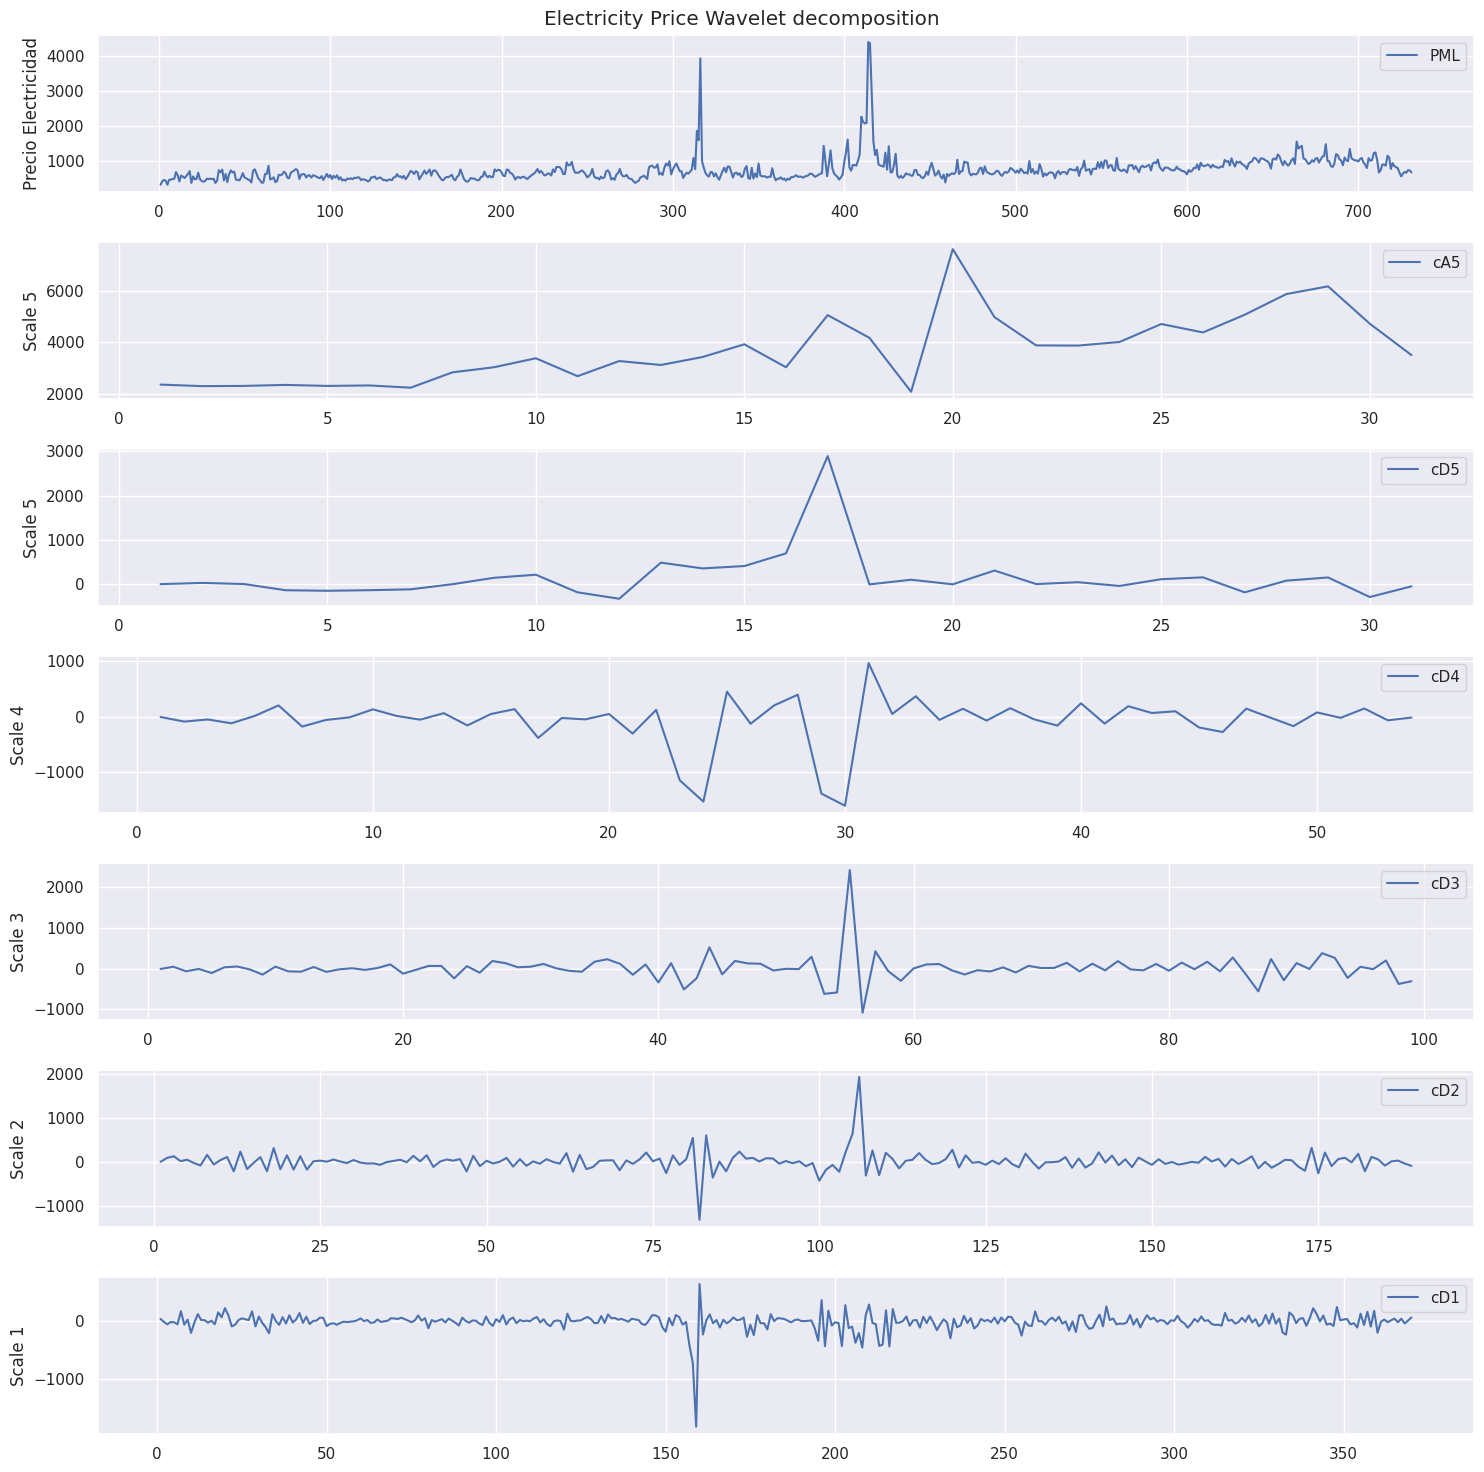

In [4]:
xscalePML_MVDWT = np.arange(1,len(train_MVDWT)+1,1)
xscalecA5_cD5trainPrice = np.arange(1,len(cA5_trainPrice)+1,1)
xscalecD5trainPrice = np.arange(1,len(cD5_trainPrice)+1,1)
xscalecD4trainPrice = np.arange(1,len(cD4_trainPrice)+1,1)
xscalecD3trainPrice = np.arange(1,len(cD3_trainPrice)+1,1)
xscalecD2trainPrice = np.arange(1,len(cD2_trainPrice)+1,1)
xscalecD1trainPrice = np.arange(1,len(cD1_trainPrice)+1,1)

fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(7,figsize=(15,15))
fig.suptitle('Electricity Price Wavelet decomposition')
sns.lineplot(ax=ax0,x=xscalePML_MVDWT,y=train_MVDWT['Precio Electricidad'],label='PML')
sns.lineplot(ax=ax1,x=xscalecA5_cD5trainPrice,y=cA5_trainPrice,label='cA5').set(ylabel = "Scale 5")
sns.lineplot(ax=ax2,x=xscalecA5_cD5trainPrice,y=cD5_trainPrice,label='cD5').set(ylabel = "Scale 5")
sns.lineplot(ax=ax3,x=xscalecD4trainPrice,y=cD4_trainPrice,label='cD4').set(ylabel = "Scale 4")
sns.lineplot(ax=ax4,x=xscalecD3trainPrice,y=cD3_trainPrice,label='cD3').set(ylabel = "Scale 3")
sns.lineplot(ax=ax5,x=xscalecD2trainPrice,y=cD2_trainPrice,label='cD2').set(ylabel = "Scale 2")
sns.lineplot(ax=ax6,x=xscalecD1trainPrice,y=cD1_trainPrice,label='cD1').set(ylabel = "Scale 1")
ax1.legend(loc='upper right')
#plt.savefig('Fig6_EP_DWT',format='pdf',dpi=600)
plt.tight_layout()

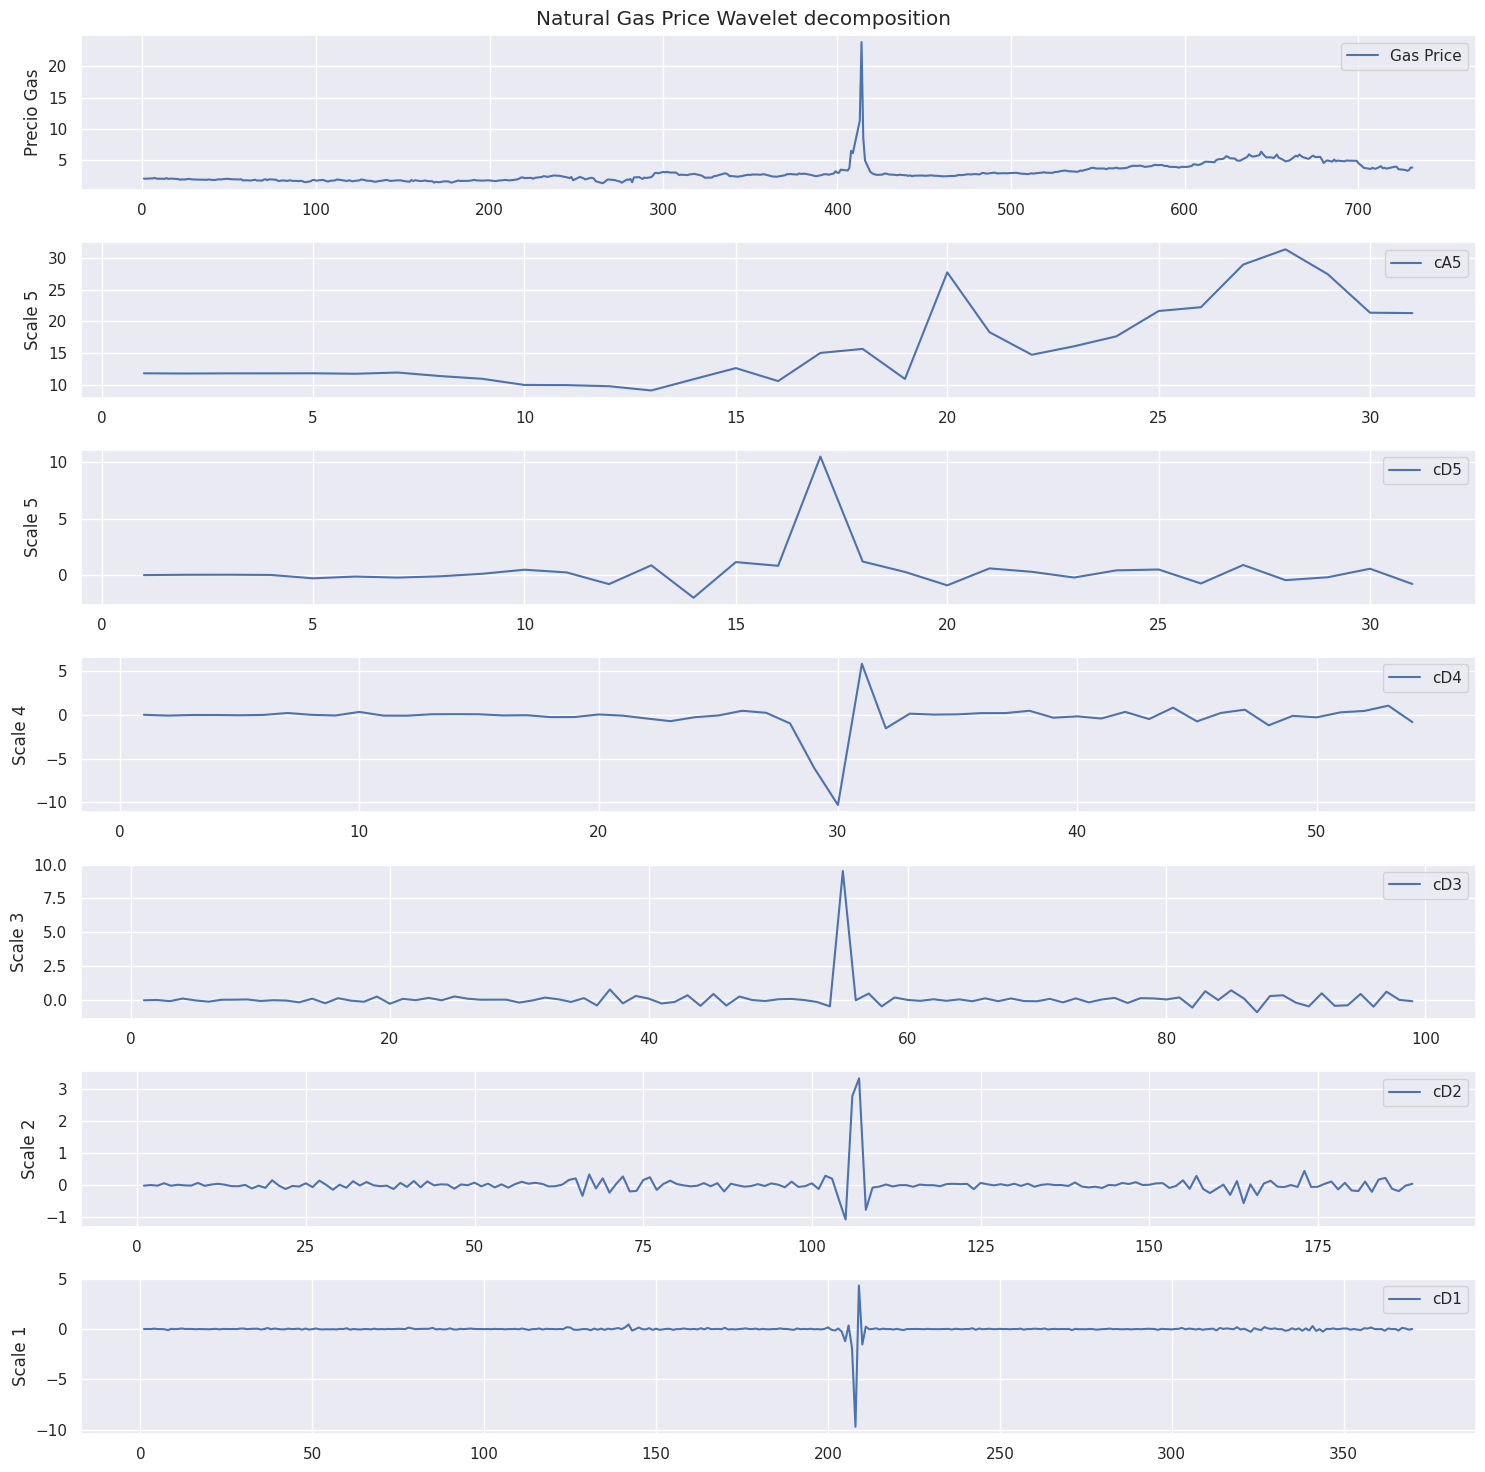

In [5]:
xscaleGas_MVDWT = np.arange(1,len(train_MVDWT)+1,1)
xscalecA5_cD5trainGas = np.arange(1,len(cA5_trainGas)+1,1)
xscalecD4trainGas = np.arange(1,len(cD4_trainGas)+1,1)
xscalecD3trainGas = np.arange(1,len(cD3_trainGas)+1,1)
xscalecD2trainGas = np.arange(1,len(cD2_trainGas)+1,1)
xscalecD1trainGas = np.arange(1,len(cD1_trainGas)+1,1)

fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(7,figsize=(15,15))
fig.suptitle('Natural Gas Price Wavelet decomposition')
sns.lineplot(ax=ax0,x=xscaleGas_MVDWT,y=train_MVDWT['Precio Gas'],label='Gas Price')
sns.lineplot(ax=ax1,x=xscalecA5_cD5trainGas,y=cA5_trainGas,label='cA5').set(ylabel = "Scale 5")
sns.lineplot(ax=ax2,x=xscalecA5_cD5trainGas,y=cD5_trainGas,label='cD5').set(ylabel = "Scale 5")
sns.lineplot(ax=ax3,x=xscalecD4trainGas,y=cD4_trainGas,label='cD4').set(ylabel = "Scale 4")
sns.lineplot(ax=ax4,x=xscalecD3trainGas,y=cD3_trainGas,label='cD3').set(ylabel = "Scale 3")
sns.lineplot(ax=ax5,x=xscalecD2trainGas,y=cD2_trainGas,label='cD2').set(ylabel = "Scale 2")
sns.lineplot(ax=ax6,x=xscalecD1trainGas,y=cD1_trainGas,label='cD1').set(ylabel = "Scale 1")
ax1.legend(loc='upper right')
#plt.savefig('Fig7_NGP_DWT',format='pdf',dpi=600)
plt.tight_layout()

Reconstructing the time series of electricity and gas by eliminating the last component (cD1) corresponding to noise in each of the series

[Text(0, 0.5, 'Reconstruct')]

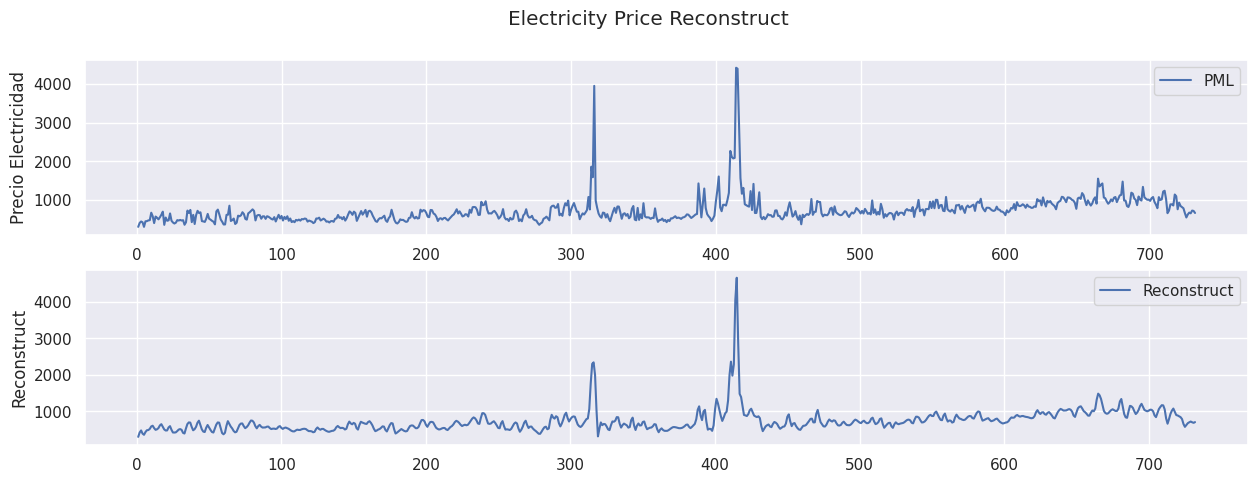

In [6]:
cA5_PriceDWT = cA5_trainPrice.copy()
cD5_PriceDWT = cD5_trainPrice.copy()
cD4_PriceDWT = cD4_trainPrice.copy()
cD3_PriceDWT = cD3_trainPrice.copy()
cD2_PriceDWT = cD2_trainPrice.copy()
cD1_PriceDWT = cD1_trainPrice.copy()

cD1_trainPrice2 = np.zeros((cD1_PriceDWT.shape[0],), dtype=int) # Setting this coefficient to zero to ignore it during reconstruction
coeffselectedPrice = [cA5_PriceDWT,cD5_PriceDWT, cD4_PriceDWT,cD3_PriceDWT,cD2_PriceDWT,cD1_trainPrice2]
reconstructionPrice = pywt.waverec(coeffselectedPrice, wavelet='db5')

xscaleRecPrice = np.arange(1,len(reconstructionPrice)+1,1)

fig, (ax0,ax1) = plt.subplots(2,figsize=(15,5))
fig.suptitle('Electricity Price Reconstruct')
sns.lineplot(ax=ax0,x=xscalePML_MVDWT,y=train_MVDWT['Precio Electricidad'],label='PML')
sns.lineplot(ax=ax1,x=xscaleRecPrice,y=reconstructionPrice,label='Reconstruct').set(ylabel = "Reconstruct")

In [9]:
cA5_GasDWT = cA5_trainGas.copy()
cD5_GasDWT = cD5_trainGas.copy()
cD4_GasDWT = cD4_trainGas.copy()
cD3_GasDWT = cD3_trainGas.copy()
cD2_GasDWT = cD2_trainGas.copy()
cD1_GasDWT = cD1_trainGas.copy()

cD1_trainGas2 = np.zeros((cD1_GasDWT.shape[0],), dtype=int) # Ponendo en ceros este coeficiente para ignorarlo durante reconstrucción

coeffselectedGas = [cA5_GasDWT,cD5_GasDWT,cD4_GasDWT,cD3_GasDWT,cD2_GasDWT,cD1_trainGas2]
reconstructionGas = pywt.waverec(coeffselectedGas, wavelet='db5')

In [10]:
train_MVDWTreconst = train.copy()
train_MVDWTreconst ['Precio Electricidad'] = reconstructionPrice[0:len(train_MVDWT)]
train_MVDWTreconst ['Precio Gas'] = reconstructionGas[0:len(train_MVDWT)]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
train_DWT2 = scaler2.fit_transform(train_MVDWTreconst)
test_DWT2  = scaler2.fit_transform(test_MVDWT)
train_DWT2.shape

array([[-1.34552929, -0.61735113],
       [-0.9763944 , -0.62403742],
       [-0.79989798, -0.62729121],
       ...,
       [-0.04270114,  0.32302327],
       [-0.10578773,  0.51632741],
       [-0.15326023,  0.65380364]])

In [12]:
# split into input and outputs
train_XMVDWT, train_yMVDWT =  train_DWT2[:, :-1], train_DWT2[:, -1]
test_XMVDWT, test_yMVDWT = test_DWT2[:, :-1], test_DWT2[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_XMVDWT = train_XMVDWT.reshape((train_XMVDWT.shape[0], 1, train_XMVDWT.shape[1]))
test_XMVDWT = test_XMVDWT.reshape((test_XMVDWT.shape[0], 1, test_XMVDWT.shape[1]))
print(train_XMVDWT.shape, train_yMVDWT.shape, test_XMVDWT.shape, test_yMVDWT.shape)

(731, 1, 1) (731,) (365, 1, 1) (365,)


In [13]:
train_XMVDWT[0, :, :]

array([[-1.34552929]])

In [25]:
train_XMVDWT.shape[1]

1

In [14]:
import os
os.environ["KERAS_BACKEND"] = "torch"

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# import tensorflow as tf
import torch
from keras.layers import Bidirectional
from keras.layers import Dropout

# Estableciendo random seed para hacer que los resultados sean reproducibles
np.random.seed(4321)
# tf.random.set_seed(4321)
torch.manual_seed(4321)

model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='linear', input_shape=(train_XMVDWT.shape[1], train_XMVDWT.shape[2]))))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=1))
model2.compile(optimizer='adam', loss='mse')
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


46/46 - 1s - 12ms/step - loss: 0.3909 - val_loss: 0.4815
Epoch 2/1000
46/46 - 0s - 11ms/step - loss: 0.3965 - val_loss: 0.4876
Epoch 3/1000
46/46 - 1s - 12ms/step - loss: 0.4044 - val_loss: 0.4846
Epoch 4/1000
46/46 - 1s - 11ms/step - loss: 0.4144 - val_loss: 0.4812
Epoch 5/1000
46/46 - 0s - 8ms/step - loss: 0.3881 - val_loss: 0.4842
Epoch 6/1000
46/46 - 0s - 8ms/step - loss: 0.4049 - val_loss: 0.4826
Epoch 7/1000
46/46 - 0s - 10ms/step - loss: 0.3894 - val_loss: 0.4835
Epoch 8/1000
46/46 - 0s - 9ms/step - loss: 0.3918 - val_loss: 0.4853
Epoch 9/1000
46/46 - 0s - 9ms/step - loss: 0.3935 - val_loss: 0.4846
Epoch 10/1000
46/46 - 1s - 12ms/step - loss: 0.3938 - val_loss: 0.4847
Epoch 11/1000
46/46 - 0s - 8ms/step - loss: 0.3927 - val_loss: 0.4897
Epoch 12/1000
46/46 - 0s - 8ms/step - loss: 0.3893 - val_loss: 0.4899
Epoch 13/1000
46/46 - 0s - 5ms/step - loss: 0.3948 - val_loss: 0.4891
Epoch 14/1000
46/46 - 1s - 11ms/step - loss: 0.3738 - val_loss: 0.4945
Epoch 15/1000
46/46 - 0s - 9ms/step

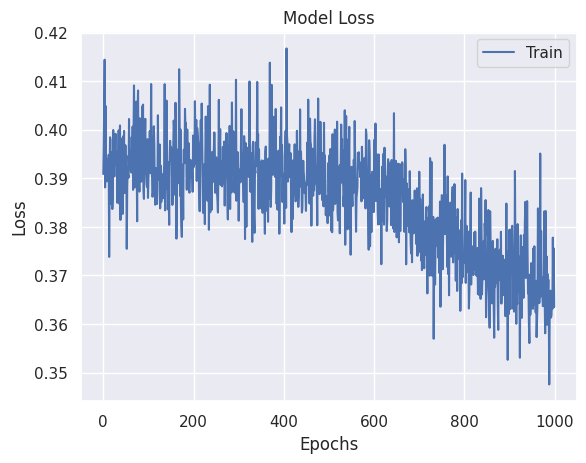

In [16]:
history_model2 = model2.fit(train_XMVDWT, train_yMVDWT, epochs=1000, batch_size=16, validation_data=(test_XMVDWT, test_yMVDWT), verbose=2, shuffle=False)
plt.plot(history_model2.history['loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'])

In [17]:
y_predtestMVDWT = model2.predict(test_XMVDWT)
invertedtestMVDWT = scaler2.inverse_transform(y_predtestMVDWT)
xscaletestMVDWT = np.arange(1,len(test_XMVDWT)+1,1)
testdf_MVDWT = test_MVDWT.copy()
testdf_MVDWT = testdf_MVDWT.drop(columns=['Precio Gas'])
testdf_MVDWT['Prediction'] = invertedtestMVDWT[:,0]

import datetime
fig, (ax1) = plt.subplots(figsize=(15,7))
fig.suptitle('EPF using MVLSTM-DWT model')
sns.lineplot(ax=ax1,x=testdf_MVDWT.index,y=testdf_MVDWT['Prediction'],label='Prediction',marker = 'X',markersize=7).set(ylabel = "$ MXN / MWh")
sns.lineplot(ax=ax1,x=testdf_MVDWT.index,y=testdf_MVDWT['Precio Electricidad'],label='Measured data', color='red')
ax1.set_xlim([datetime.date(2022, 1, 1), datetime.date(2023,1,1)])
ax1.legend(loc='upper right')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


ValueError: non-broadcastable output operand with shape (365,1) doesn't match the broadcast shape (365,2)

## Conformal Prediction

## Resources

* https://github.com/jorgetorre70/Electricity_Price_Forecast/blob/main/EPF_LSTM_MVDWT_CP.ipynb
* https://onlinelibrary.wiley.com/doi/10.1002/ese3.1710
* https://medium.com/analytics-vidhya/from-keras-to-pytorch-722fa3b65cce

* https://stackoverflow.com/questions/43514247/pywavelet-signal-reconstruction